#  install & import librosa, soundfile, numpy, sklearn

In [ ]:
#import libraries which are required to make model
import librosa
import soundfile
import os,glob,pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# MLP Classifier

In [ ]:
#this function will extract the mfcc,chroma and mel features from sound file.
def extract_feature(file_name, mfcc, chroma, mel):
  with soundfile.SoundFile(file_name) as sound_file:
    X = sound_file.read(dtype="float32")
    sample_rate = sound_file.samplerate
    
    if chroma:
      stft = np.abs(librosa.stft(X))
    result = np.array([])

    if mfcc:
      mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=40).T, axis=0)
    result = np.hstack((result,mfccs))

    if chroma:
      chroma = np.mean(librosa.feature.chroma_stft(S = stft,sr = sample_rate).T, axis=0)
    result = np.hstack((result,chroma))

    if mel:
      mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0)
    result = np.hstack((result,mel))
  return result


In [ ]:
#emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#emotions we will observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [ ]:
def load_data(test_size=0.35):
    x,y=[],[]
    for file in glob.glob("//content//drive//MyDrive//audio_speech_actors_01-24/Actor_*//*.wav"):
        file_name=os.path.basename(file)
        #print(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9) 
    

In [ ]:
# We will split the dataset in two parts train and test
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [ ]:
#we will get the shape of training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(573, 191)


In [ ]:
#this will get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [ ]:
# initializing multi-layer perception classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#predict the test set
y_pred=model.predict(x_test)

In [ ]:
#calculate the accuracy of our model
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 76.44%


In [ ]:
#it will give casslification report of the model.
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        calm       0.74      0.94      0.83        52
     disgust       0.67      0.81      0.73        36
     fearful       0.76      0.90      0.83        42
       happy       0.94      0.49      0.65        61

    accuracy                           0.76       191
   macro avg       0.78      0.79      0.76       191
weighted avg       0.80      0.76      0.75       191



In [ ]:
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[49  3  0  0]
 [ 4 29  1  2]
 [ 1  3 38  0]
 [12  8 11 30]]


# SVC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [ ]:
#split the dataset in two parts train and test
x_train,x_test,y_train,y_test=load_data(test_size=0.35)

In [ ]:
#setup the pipeline steps 
steps = [('Scaler',StandardScaler()),
         ('SVM',SVC())]

In [ ]:
#create the pipeline
pipeline = Pipeline(steps)

In [ ]:
#fit the pipeline to training set to svc_scaled
svc_scaled = pipeline.fit(x_train,y_train)

In [ ]:
#fit the pipeline to training set to svc_unscaled
svc_unscaled = SVC(kernel = 'linear').fit(x_train,y_train)

In [ ]:
print('Accuracy with Scaling: {}'.format(svc_scaled.score(x_test,y_test)))

Accuracy with Scaling: 0.6380597014925373


In [ ]:
print('Accuracy without Scaling : {}'.format(svc_unscaled.score(x_test,y_test)))

Accuracy without Scaling : 0.6828358208955224


In [ ]:
train_acc = float(svc_scaled.score(x_train,y_train)*100)
print("Train accuracy is %s"% train_acc)

Train accuracy is 77.41935483870968


In [ ]:
test_acc = float(svc_scaled.score(x_test,y_test)*100)
print("Test accuracy is %s"% test_acc)

Test accuracy is 63.80597014925373


In [ ]:
train_acc = float(svc_unscaled.score(x_train,y_train)*100)
print("Train accuracy is %s"% train_acc)

Train accuracy is 89.51612903225806


In [ ]:
test_acc = float(svc_unscaled.score(x_test,y_test)*100)
print("Test accuracy is %s"% test_acc)

Test accuracy is 68.28358208955224


In [ ]:
scaled_predictions = svc_scaled.predict(x_test)

In [ ]:
unscaled_predictions = svc_unscaled.predict(x_test)

In [ ]:
import seaborn as sn

In [ ]:
print(classification_report(y_test,scaled_predictions))

              precision    recall  f1-score   support

        calm       0.73      0.92      0.81        76
     disgust       0.46      0.65      0.54        55
     fearful       0.65      0.55      0.60        65
       happy       0.74      0.40      0.52        72

    accuracy                           0.64       268
   macro avg       0.65      0.63      0.62       268
weighted avg       0.66      0.64      0.63       268



In [ ]:
acc = float(accuracy_score(y_test,scaled_predictions))*100
print("Accuracy score is %s"% acc)

Accuracy score is 63.80597014925373


In [ ]:
acc = float(accuracy_score(y_test,unscaled_predictions))*100
print("Accuracy score is %s"% acc)

Accuracy score is 68.28358208955224


In [ ]:
conf_mat = confusion_matrix(y_test,scaled_predictions)
df_cm = pd.DataFrame(conf_mat)

              precision    recall  f1-score   support

        calm       0.73      0.92      0.81        76
     disgust       0.46      0.65      0.54        55
     fearful       0.65      0.55      0.60        65
       happy       0.74      0.40      0.52        72

    accuracy                           0.64       268
   macro avg       0.65      0.63      0.62       268
weighted avg       0.66      0.64      0.63       268



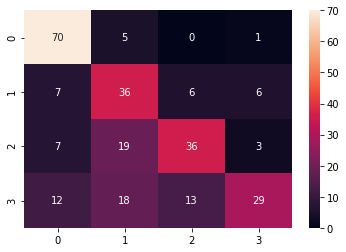

In [ ]:
print(classification_report(y_test,scaled_predictions))
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

              precision    recall  f1-score   support

        calm       0.79      0.83      0.81        76
     disgust       0.56      0.75      0.64        55
     fearful       0.71      0.52      0.60        65
       happy       0.67      0.62      0.65        72

    accuracy                           0.68       268
   macro avg       0.68      0.68      0.67       268
weighted avg       0.69      0.68      0.68       268



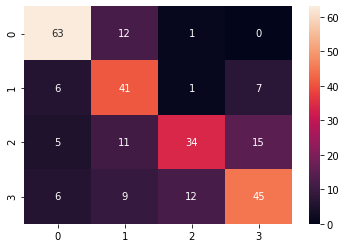

In [ ]:
conf_mat = confusion_matrix(y_test,unscaled_predictions)
df_cm = pd.DataFrame(conf_mat)

print(classification_report(y_test,unscaled_predictions))
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()